# Математика для машинного обучения
## Домашнее задание

_Автор задания: Илья Щуров_

Подготовлено для программы «[Практический анализ данных и машинное обучение](https://cs.hse.ru/dpo/bigml)» (ФКН НИУ ВШЭ).

Задание выполнил(а): *Матхеев Николай*

## Статистика

### Описательные статистики

Для выборки $x_1, x_2, \ldots, x_n$ определены следующие величины (они часто называются *описательными статистиками*):

1. Выборочное среднее: $$\bar x = \frac{x_1 + x_2 + \ldots + x_n}{n}.$$
2. Выборочная дисперсия: $$\sigma^2 = \frac{(x_1-\bar x)^2 + (x_2 - \bar x)^2 + \ldots + (x_n - \bar x)^2}{n}.$$
3. Исправленная выборочная дисперсия: $$\sigma_+^2 = \frac{(x_1-\bar x)^2 + (x_2 - \bar x)^2 + \ldots + (x_n - \bar x)^2}{n - 1}.$$
4. Выборочное стандартное отклонение: квадратный корень из выборочной дисперсии (обозначается $\sigma$ или $SD$).
5. Исправленное выборочное стандартное отклонение: квадратный корень из исправленной выборочной дисперсии (обозначается $\sigma_+$ или $SD_+$ или ещё как-нибудь).
6. [Медиана](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D0%B4%D0%B8%D0%B0%D0%BD%D0%B0_(%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D0%B0%29).

### Задача 1
Для выборки $\{1, 10, 2, 15, 100\}$ найти все характеристики, перечисленные выше.

Подсказка: можно использовать функции `np.mean`, `np.var`, `np.std`, `np.median`. Для вычисления исправленной выборочной дисперсии и исправленного выборочного стандартного отклонения необходимо соответствующим функциям передать параметр `ddof=1`.

In [2]:
import numpy as np

In [110]:
# впишите решение сюда
data1 = np.array([1,10,2,15,100])
mean = np.mean(data1)

var = np.var(data1)
ivar = np.var(data1, ddof=1)
sd = np.std(data1)
isd = np.std(data1, ddof=1)
median = np.median(data1)

pd.DataFrame({'metrics': [mean, var, ivar, sd, isd, median]}, index=['mean', 'variance', 'corr_var', 'std', 'corr_std', 'median'])

,metrics
mean,25.600000
variance,1410.640000
corr_var,1763.300000
std,37.558488
corr_std,41.991666
median,10.000000


### Квартет Энскомба
Загрузим набор данных, который называется «квартетом Энскомба». (Нам потребуется использовать пакет `pandas`.)

In [5]:
import pandas as pd
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/anscombe.csv"
data = pd.read_csv(url, index_col=0)
data

,x1,x2,x3,x4,y1,y2,y3,y4
1,10,10,10,8,8.04,9.14,7.46,6.58
2,8,8,8,8,6.95,8.14,6.77,5.76
3,13,13,13,8,7.58,8.74,12.74,7.71
4,9,9,9,8,8.81,8.77,7.11,8.84
5,11,11,11,8,8.33,9.26,7.81,8.47
6,14,14,14,8,9.96,8.10,8.84,7.04
7,6,6,6,8,7.24,6.13,6.08,5.25
8,4,4,4,19,4.26,3.10,5.39,12.50
9,12,12,12,8,10.84,9.13,8.15,5.56
10,7,7,7,8,4.82,7.26,6.42,7.91


Для обращения к отдельным переменным (стобцам таблицы) нужно использовать такой синтаксис:

In [6]:
data['x1']

1     10
2      8
3     13
4      9
5     11
6     14
7      6
8      4
9     12
10     7
11     5
Name: x1, dtype: int64

(Первая колонка — номер наблюдения; на неё сейчас можно не обращать внимания.)

### Задача 2
1. Для каждой из переменных, входящих в «квартет Энскомба», найти среднее и выборочную дисперсию.
2. Для каждой из четырёх пар соответствующих переменных (`x1` и `y1`, `x2` и `y2` и т.д.) найти корреляцию Пирсона. (Подсказка: можно использовать функцию `pearsonr` из `scipy.stats`: она возвращает пару, первый элемент которой — коэффициент корреляции, а второй — *p-value* для проверки нулевой гипотезы об отсутствии зависимости между величинами.)
3. Для каждой из указанных пар переменных построить scatter plot. (Подсказка: можно использовать `plt.plot` или `plt.scatter`.)

*Квартет Энскомба демонстрирует, что даже если числовые характеристики выборок совпадают, их реальное распределение и характер связей между переменными могут существенно различаться. Поэтому визуализация — важный элемент анализа данных.*

In [14]:
import scipy
from scipy.stats import pearsonr

In [30]:
import scipy.stats as sps

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# впишите решение сюда
print("Task1")
for var in data.columns:
    print("Var \"%s\": mean=%f, var=%f" % (var, np.mean(data[var]), np.var(data[var])) )

Task1
Var "x1": mean=9.000000, var=10.000000
Var "x2": mean=9.000000, var=10.000000
Var "x3": mean=9.000000, var=10.000000
Var "x4": mean=9.000000, var=10.000000
Var "y1": mean=7.500909, var=3.752063
Var "y2": mean=7.500909, var=3.752390
Var "y3": mean=7.500000, var=3.747836
Var "y4": mean=7.500909, var=3.748408


In [24]:
from itertools import product

Pair ('x1', 'y1'): pearsonr = 0.816421
Pair ('x2', 'y2'): pearsonr = 0.816237
Pair ('x3', 'y3'): pearsonr = 0.816287
Pair ('x4', 'y4'): pearsonr = 0.816521


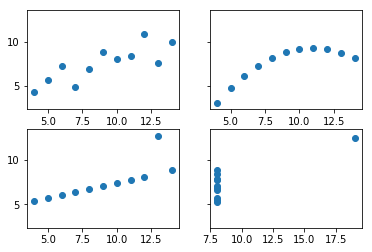

In [29]:
fig, axs = plt.subplots(2,2, sharey=True)
for x, y, idx in zip(data.columns[:4], data.columns[4:], product([0,1], [0,1])):
    axs[idx[0], idx[1]].scatter(data[x], data[y])
    print("Pair %s: pearsonr = %f" % (repr((x,y)), pearsonr(data[x], data[y])[0]))

### Задача 3
Будем проводить следующий эксперимент: сгенерируем две различные независимые выборки размером `n = 5` из равномерного распределения на отрезке $[0, 1]$. С помощью теста Стьюдента проверим гипотезу о том, что эти две выборки были получены из распределений с различными средними ($H_0\colon m_1 = m_2$, $H_1\colon m_1 ≠ m_2$) на уровне значимости 5%.

Повторим этот эксперимент 10000 раз. Сколько раз мы будем совершать ошибку первого рода, то есть ошибочно отвергать нулевую гипотезу? Что будет, если изменить уровень значимости (например, использовать уровень значимости 1%)? Что будет, если увеличить размер выборки до `n = 20`?

Для генерирования выборок можно использовать `uniform.rvs`, для теста Стьюдента — `ttest_ind` (обе функции из пакета `scipy.stats`). Последняя функция возвращает пару, состоящую из значения t-статистики и p-value.

In [32]:
# впишите решение сюда
n = 5
src1 = np.random.uniform(size=n)
src2 = np.random.uniform(size=n)
ts, pv = sps.ttest_ind(src1, src2)
if pv > 0.05:
    print("Rejecting null hypothesis")

Rejecting null hypothesis


In [53]:
gpop1 = np.random.uniform(size=(n, 10000))
gpop2 = np.random.uniform(size=(n, 10000))

res = sps.ttest_ind(gpop1, gpop2, axis=0)
pv_low_thresh = np.apply_along_axis(lambda x: 1 if x <= 0.05 else 0, axis=0, arr=res.pvalue.reshape(1, 10000))
print("There're %d times pvalue was less than 0.05" % pv_low_thresh.sum())

There're 551 times pvalue was less than 0.05


In [59]:
n2 = 20
sign_level2 = 0.01
gpop1 = np.random.uniform(size=(n2, 10000))
gpop2 = np.random.uniform(size=(n2, 10000))

res = sps.ttest_ind(gpop1, gpop2, axis=0)
pv_low_thresh = np.apply_along_axis(lambda x: 1 if x <= sign_level2 else 0, axis=0, arr=res.pvalue.reshape(1, 10000))
print("There're %d times pvalue was less than %.2f" % (pv_low_thresh.sum(), sign_level2))

There're 113 times pvalue was less than 0.01


### Задача 4
Будем проводить следующий численный эксперимент. Сгенерируем две независимые выборки из стандартного нормального распределения одинаковой длины `n = 10`. Посчитаем коэффициент корреляции Пирсона между ними. Повторим процедуру 1000 раз. Выберем пару выборок с наибольшим по модулю коэффициентом корреляции.

Указать, какой коэффициент корреляции получится. Нарисовать scatter plot для этой пары выборок.

*Эта задача показывает, что если долго искать, то можно найти хорошо коррелирующие переменные, даже если они заведомо были порождены независимыми случайными величинами.*

In [97]:
# впишите решение сюда
n3 = 10
repeat = 1000
gp1 = np.random.uniform(size=(n3, repeat))
gp2 = np.random.uniform(size=(n3, repeat))

res = []

for x in range(repeat):
    pc = sps.pearsonr(gp1[:,x], gp2[:,x])
    res.append(pc[0])

df = pd.DataFrame({'pearson': res})
df['absol'] = df.pearson.apply(lambda x: np.abs(x))

In [98]:
df.shape

(1000, 2)

In [102]:
max_pear_idx = df.absol.sort_values(ascending=False).head(1).index.tolist()[0]
df.absol.sort_values(ascending=False).head(1)

883    0.959067
Name: absol, dtype: float64

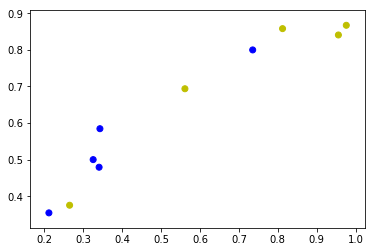

In [104]:
plt.scatter(gp1[:, max_pear_idx], gp2[:, max_pear_idx], c=['b', 'y'])